<a href="https://colab.research.google.com/github/f8sle/report/blob/main/%EA%B8%B0%EB%A7%90%EA%B3%A0%EC%82%AC20250613.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **기말고사(20250613)**
학번 : 2020140008             
성명 : 박성훈

# **문제 1) ANN Backpropagation**

In [33]:
# Back-propagation of ANN with numpy
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
# Data Generation
np.random.seed(0)
num_samples = 300

x1 = np.random.uniform(0, 1, num_samples)
x2 = np.random.uniform(0, 1, num_samples)
x3 = np.random.uniform(0, 1, num_samples)

# Target
y = 3 * x1 - 2 * x2 + x3

Epoch 10/100, MSE: 1.1920, MAPE: 304.5244%
Epoch 20/100, MSE: 1.1836, MAPE: 304.4806%
Epoch 30/100, MSE: 1.1745, MAPE: 304.3345%
Epoch 40/100, MSE: 1.1641, MAPE: 304.0253%
Epoch 50/100, MSE: 1.1517, MAPE: 303.4814%
Epoch 60/100, MSE: 1.1367, MAPE: 302.6201%
Epoch 70/100, MSE: 1.1183, MAPE: 301.3343%
Epoch 80/100, MSE: 1.0956, MAPE: 299.4881%
Epoch 90/100, MSE: 1.0677, MAPE: 296.9188%
Epoch 100/100, MSE: 1.0336, MAPE: 293.4314%

Final Results:
Final MSE: 1.0336
Final MAPE: 293.4314%


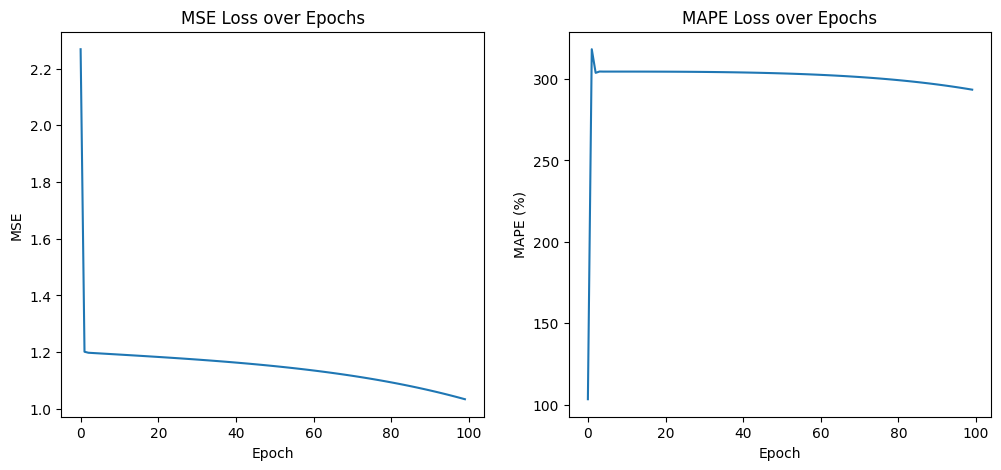

In [53]:
# Sigmoid activation function and its derivative
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

# MSE and MAPE functions
def mse(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

def mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / (y_true + 1e-10))) * 100

# Data Generation
np.random.seed(0)
num_samples = 300
x1 = np.random.uniform(0, 1, num_samples)
x2 = np.random.uniform(0, 1, num_samples)
x3 = np.random.uniform(0, 1, num_samples)
X = np.vstack((x1, x2, x3)).T
y = (3 * x1 - 2 * x2 + x3).reshape(-1, 1)

# ANN Architecture
input_size = 3
hidden_size = 10
output_size = 1

# Initialize weights and biases
W1 = np.random.randn(input_size, hidden_size) * 0.01
b1 = np.zeros((1, hidden_size))
W2 = np.random.randn(hidden_size, output_size) * 0.01
b2 = np.zeros((1, output_size))

# Hyperparameters
learning_rate = 0.001
epochs = 100

# Training
mse_history = []
mape_history = []

for epoch in range(epochs):
    # Forward propagation
    z1 = np.dot(X, W1) + b1
    a1 = sigmoid(z1)
    z2 = np.dot(a1, W2) + b2
    a2 = z2  # Linear activation for output (since it's a regression problem)

    # Compute loss
    mse_loss = mse(y, a2)
    mape_loss = mape(y, a2)
    mse_history.append(mse_loss)
    mape_history.append(mape_loss)

    # Backward propagation
    error_output = a2 - y
    delta_output = error_output  # Derivative of linear activation is 1

    error_hidden = np.dot(delta_output, W2.T)
    delta_hidden = error_hidden * sigmoid_derivative(a1)

    # Update weights and biases
    W2 -= learning_rate * np.dot(a1.T, delta_output)
    b2 -= learning_rate * np.sum(delta_output, axis=0, keepdims=True)
    W1 -= learning_rate * np.dot(X.T, delta_hidden)
    b1 -= learning_rate * np.sum(delta_hidden, axis=0, keepdims=True)

    # Print progress every 10 epochs
    if (epoch + 1) % 10 == 0:
        print(f"Epoch {epoch + 1}/{epochs}, MSE: {mse_loss:.4f}, MAPE: {mape_loss:.4f}%")

# Final evaluation
print("\nFinal Results:")
print(f"Final MSE: {mse_history[-1]:.4f}")
print(f"Final MAPE: {mape_history[-1]:.4f}%")

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(mse_history)
plt.title('MSE Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.subplot(1, 2, 2)
plt.plot(mape_history)
plt.title('MAPE Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('MAPE (%)')
plt.show()


# **문제 2) CNN**
- Data
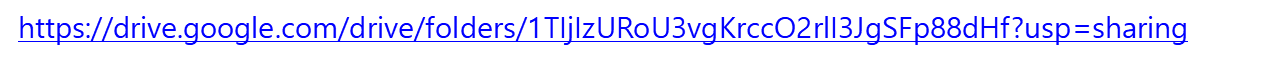

In [44]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [45]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [46]:
# 0,1,2,3,4, and 5 finger image data set

train_x = np.load('/content/drive/MyDrive/Colab Notebooks/sample/Finger_train_img.npy')
train_y = np.load('/content/drive/MyDrive/Colab Notebooks/sample/Finger_train_label.npy')

test_x = np.load('/content/drive/MyDrive/Colab Notebooks/sample/Finger_test_img.npy')
test_y = np.load('/content/drive/MyDrive/Colab Notebooks/sample/Finger_test_label.npy')

In [57]:
import tensorflow.compat.v1 as tf
import numpy as np
import matplotlib.pyplot as plt
tf.disable_v2_behavior()

# Load dataset
# Make sure the file paths are correct! You might need to change them if not running on Colab!
try:
    train_x = np.load('/content/drive/MyDrive/Colab Notebooks/sample/Finger_train_img.npy')
    train_y = np.load('/content/drive/MyDrive/Colab Notebooks/sample/Finger_train_label.npy')
    test_x = np.load('/content/drive/MyDrive/Colab Notebooks/sample/Finger_test_img.npy')
    test_y = np.load('/content/drive/MyDrive/Colab Notebooks/sample/Finger_test_label.npy')
except FileNotFoundError:
    print("File path not found! Please check the data file paths.")
    # You might need to handle the error or directly modify the paths.
    exit() # Cannot proceed without files, so exit

# Normalize
train_x, test_x = train_x / 255.0, test_x / 255.0

# Reshape
input_h, input_w, input_ch = 300, 300, 1
try:
    train_x = train_x.reshape((-1, 300, 300, 1))
    test_x = test_x.reshape((-1, 300, 300, 1))
    print("Image size: 300x300")
except ValueError:
    input_h, input_w = 100, 100
    train_x = train_x.reshape((-1, 100, 100, 1))
    test_x = test_x.reshape((-1, 100, 100, 1))
    print("Image size: 100x100")


# Model architecture parameters
k1_h, k1_w, k1_ch = 3, 3, 32
p1_h, p1_w = 2, 2
k2_h, k2_w, k2_ch = 3, 3, 64
p2_h, p2_w = 2, 2

# Calculate conv_result_size here!
conv_result_size = (input_h // (p1_h * p2_h)) * (input_w // (p1_w * p2_w)) * k2_ch

n_hidden = 100
n_output = 6

print(f"Final image size: {input_h}x{input_w}")
print(f"Convolution result flatten size: {conv_result_size}")
print(f"Number of output classes: {n_output}") # n_output 확인용


# Weights and biases
weights = {
    'conv1': tf.Variable(tf.random.normal([k1_h, k1_w, input_ch, k1_ch], stddev=0.1)),
    'conv2': tf.Variable(tf.random.normal([k2_h, k2_w, k1_ch, k2_ch], stddev=0.1)),
    'hidden': tf.Variable(tf.random.normal([conv_result_size, n_hidden], stddev=0.1)),
    'output': tf.Variable(tf.random.normal([n_hidden, n_output], stddev=0.1))
}
biases = {
    'conv1': tf.Variable(tf.random.normal([k1_ch], stddev=0.1)),
    'conv2': tf.Variable(tf.random.normal([k2_ch], stddev=0.1)),
    'hidden': tf.Variable(tf.random.normal([n_hidden], stddev=0.1)),
    'output': tf.Variable(tf.random.normal([n_output], stddev=0.1))
}

# Placeholders
x = tf.placeholder(tf.float32, [None, input_h, input_w, input_ch])
y = tf.placeholder(tf.float32, [None, n_output])

# Network
def net(x, weights, biases):
    conv1 = tf.nn.conv2d(x, weights['conv1'], strides=[1,1,1,1], padding='SAME')
    conv1 = tf.nn.relu(tf.add(conv1, biases['conv1']))
    maxp1 = tf.nn.max_pool(conv1, ksize=[1,p1_h,p1_w,1], strides=[1,2,2,1], padding='VALID')

    conv2 = tf.nn.conv2d(maxp1, weights['conv2'], strides=[1,1,1,1], padding='SAME')
    conv2 = tf.nn.relu(tf.add(conv2, biases['conv2']))
    maxp2 = tf.nn.max_pool(conv2, ksize=[1,p2_h,p2_w,1], strides=[1,2,2,1], padding='VALID')

    flatten = tf.reshape(maxp2, [-1, conv_result_size])
    hidden = tf.nn.relu(tf.add(tf.matmul(flatten, weights['hidden']), biases['hidden']))

    output = tf.add(tf.matmul(hidden, weights['output']), biases['output'])  # logits only
    return output

# Build graph
logits = net(x, weights, biases)
loss = tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=y)
loss = tf.reduce_mean(loss)
LR = 0.0001
optm = tf.train.AdamOptimizer(learning_rate=LR).minimize(loss)

# Accuracy
pred_prob = tf.nn.softmax(logits)  # softmax only for prediction
correct_pred = tf.equal(tf.argmax(pred_prob, 1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

# Training
n_batch = 50
n_iter = 1000
n_prt = 50

sess = tf.Session()
sess.run(tf.global_variables_initializer())

loss_record_train = []
loss_record_test = []

for epoch in range(n_iter):
    batch_indices = np.random.choice(train_x.shape[0], size=n_batch, replace=False)
    batch_x = train_x[batch_indices]
    batch_y = train_y[batch_indices]

    sess.run(optm, feed_dict={x: batch_x, y: batch_y})

    if epoch % n_prt == 0:
        test_indices = np.random.choice(test_x.shape[0], size=n_batch, replace=False)
        test_batch_x = test_x[test_indices]
        test_batch_y = test_y[test_indices]

        train_loss = sess.run(loss, feed_dict={x: batch_x, y: batch_y})
        test_loss = sess.run(loss, feed_dict={x: test_batch_x, y: test_batch_y})
        loss_record_train.append(train_loss)
        loss_record_test.append(test_loss)

        print(f"[{epoch:04d}] Train Loss: {train_loss:.4f} / Test Loss: {test_loss:.4f}")

# Final accuracy
test_accuracy = sess.run(accuracy, feed_dict={x: test_x, y: test_y})
print(f"\n Final Test Accuracy: {test_accuracy:.4f}")

# Plot
plt.figure(figsize=(10, 8))
plt.plot(np.arange(len(loss_record_train)) * n_prt, loss_record_train, 'r', label='Train')
plt.plot(np.arange(len(loss_record_test)) * n_prt, loss_record_test, 'b', label='Test')
plt.xlabel('Iteration', fontsize=15)
plt.ylabel('Loss', fontsize=15)
plt.legend(fontsize=12)
plt.title("Training vs Test Loss")
plt.ylim([0, max(max(loss_record_train), max(loss_record_test)) * 1.1])
plt.grid(True)
plt.show()

# Cleanup
sess.close()


Image size: 100x100
Final image size: 100x100
Convolution result flatten size: 40000
Number of output classes: 6
[0000] Train Loss: 2.6945 / Test Loss: 3.3018
[0050] Train Loss: 1.5939 / Test Loss: 1.7516
[0100] Train Loss: 1.4179 / Test Loss: 1.4332
[0150] Train Loss: 1.1141 / Test Loss: 1.2414


KeyboardInterrupt: 

# **문제 3) K-means clustering**

In [22]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)
data1 = np.array((np.random.normal(0, 0.2, 100), np.random.normal(0.0, 0.4, 100)))
data2 = np.array((np.random.normal(1.2, 0.3, 100), np.random.normal(1.1, 0.7, 100)))
data3 = np.array((np.random.normal(1.6, 0.2, 100), np.random.normal(1.8, 0.7, 100)))
data4 = np.array((np.random.normal(0.3, 0.1, 100), np.random.normal(0.5, 0.3, 100)))

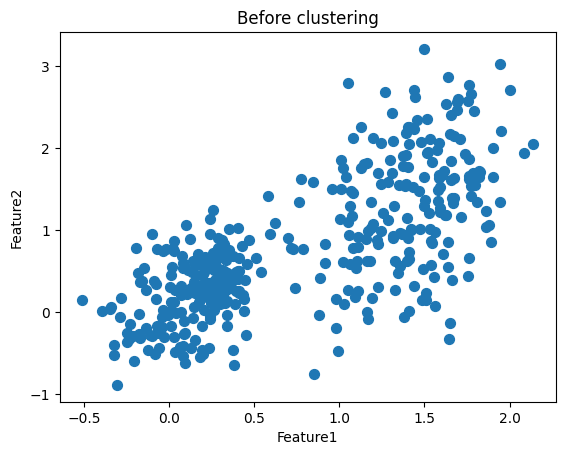

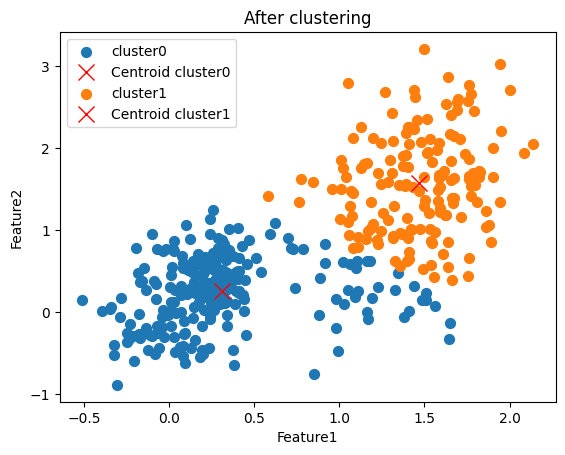

Optimal number of clusters (Elbow point): 2
Final centroids:
[[0.30869213 0.25709389]
 [1.46807301 1.57001242]]


In [32]:
import numpy as np
import matplotlib.pyplot as plt

# Data Generation (exactly as provided)
np.random.seed(0)
data1 = np.array((np.random.normal(0, 0.2, 100), np.random.normal(0.0, 0.4, 100))).T
data2 = np.array((np.random.normal(1.2, 0.3, 100), np.random.normal(1.1, 0.7, 100))).T
data3 = np.array((np.random.normal(1.6, 0.2, 100), np.random.normal(1.8, 0.7, 100))).T
data4 = np.array((np.random.normal(0.3, 0.1, 100), np.random.normal(0.5, 0.3, 100))).T

# Concatenate datasets correctly
X = np.concatenate((data1, data2, data3, data4), axis=0)
N, num_features = X.shape[0], X.shape[1]

# K-means clustering function
def kmeans(X, k, centroids_init, max_iters=100):
    # Validate centroids_init shape
    if centroids_init.shape != (k, X.shape[1]):
        raise ValueError(f"centroids_init shape {centroids_init.shape} does not match expected (k={k}, features={X.shape[1]})")

    centroids = centroids_init.copy()
    for _ in range(max_iters):
        # Assign points to nearest centroid
        distances = np.sqrt(((X - centroids[:, np.newaxis])**2).sum(axis=2))
        labels = np.argmin(distances, axis=0)

        # Update centroids
        new_centroids = np.array([X[labels == i].mean(axis=0) if np.sum(labels == i) > 0 else centroids[i]
                                 for i in range(k)])

        # Check convergence
        if np.all(centroids == new_centroids):
            break
        centroids = new_centroids

    # Calculate inertia (within-cluster sum of squares)
    inertia = np.sum([np.sum((X[labels == i] - centroids[i])**2) for i in range(k)])
    return labels, centroids, inertia

# Initialize centroids as means of the four data sets
centroids_init = np.array([data1.mean(axis=0), data2.mean(axis=0),
                          data3.mean(axis=0), data4.mean(axis=0)])
# Verify initial centroids shape
if centroids_init.shape != (4, 2):
    raise ValueError(f"Initial centroids shape {centroids_init.shape} does not match expected (4, 2)")

# Elbow method to find optimal K
inertias = []
K_range = range(1, 11)
for k in K_range:
    if k <= 4:
        init_centroids = centroids_init[:k]
    else:
        init_centroids = X[np.random.choice(X.shape[0], k, replace=False)]

    labels, centroids, inertia = kmeans(X, k, init_centroids)
    inertias.append(inertia)

# Find Elbow point (using second derivative approximation)
diff = np.diff(inertias)
diff2 = np.diff(diff)
K = K_range[1:-1][np.argmax(diff2)] if len(diff2) > 0 else 4

# Run K-means with optimal K
init_centroids = centroids_init[:K] if K <= 4 else X[np.random.choice(X.shape[0], K, replace=False)]
nearest_centroid, centroids, _ = kmeans(X, K, init_centroids)

# Plotting the clusters (adapted from scikit-learn example)
# Before clustering
plt.figure(0)
plt.scatter(X[:, 0], X[:, 1], s=50)
plt.title("Before clustering")
plt.xlabel('Feature1')
plt.ylabel('Feature2')
plt.show()

# After clustering
plt.figure(1)
for i in range(K):
    plt.scatter(X[nearest_centroid == i, 0], X[nearest_centroid == i, 1], s=50, label=f'cluster{i}')
    plt.plot(centroids[i, 0], centroids[i, 1], 'x', markersize=12, color = 'red' ,label=f'Centroid cluster{i}')
plt.legend()
plt.title("After clustering")
plt.xlabel('Feature1')
plt.ylabel('Feature2')
plt.show()

# Print results
print(f"Optimal number of clusters (Elbow point): {K}")
print(f"Final centroids:\n{centroids}")